In [414]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

Data preparation

Load dataset

In [415]:
data = pd.read_csv('/content/tested.csv')
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


Data info

In [416]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


Handling Missing value

In [417]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [430]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [431]:
data.dropna(inplace=True)

Exploratory Datra Analysis

Probability and Statics Concepts

In [432]:
print(data.describe())

       PassengerId   Survived     Pclass        Sex        Age      SibSp  \
count    87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean   1102.712644   0.505747   1.137931   0.505747  39.247126   0.597701   
std     126.751901   0.502865   0.435954   0.502865  15.218730   0.637214   
min     904.000000   0.000000   1.000000   0.000000   1.000000   0.000000   
25%     986.000000   0.000000   1.000000   0.000000  27.000000   0.000000   
50%    1094.000000   1.000000   1.000000   1.000000  39.000000   1.000000   
75%    1216.000000   1.000000   1.000000   1.000000  50.000000   1.000000   
max    1306.000000   1.000000   3.000000   1.000000  76.000000   3.000000   

           Parch        Fare  
count  87.000000   87.000000  
mean    0.482759   98.109198  
std     0.860801   88.177319  
min     0.000000    0.000000  
25%     0.000000   35.339600  
50%     0.000000   71.283300  
75%     1.000000  135.066650  
max     4.000000  512.329200  


Visualization

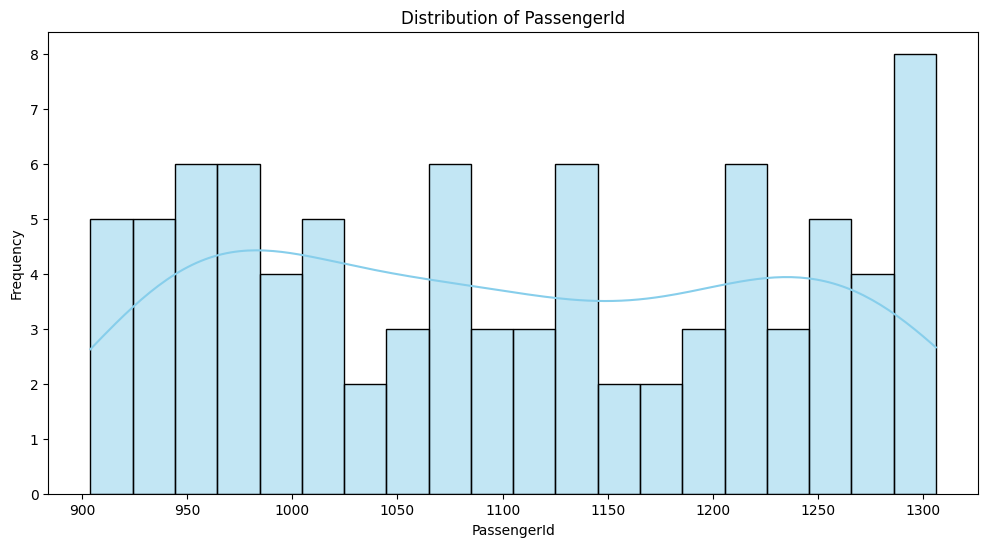

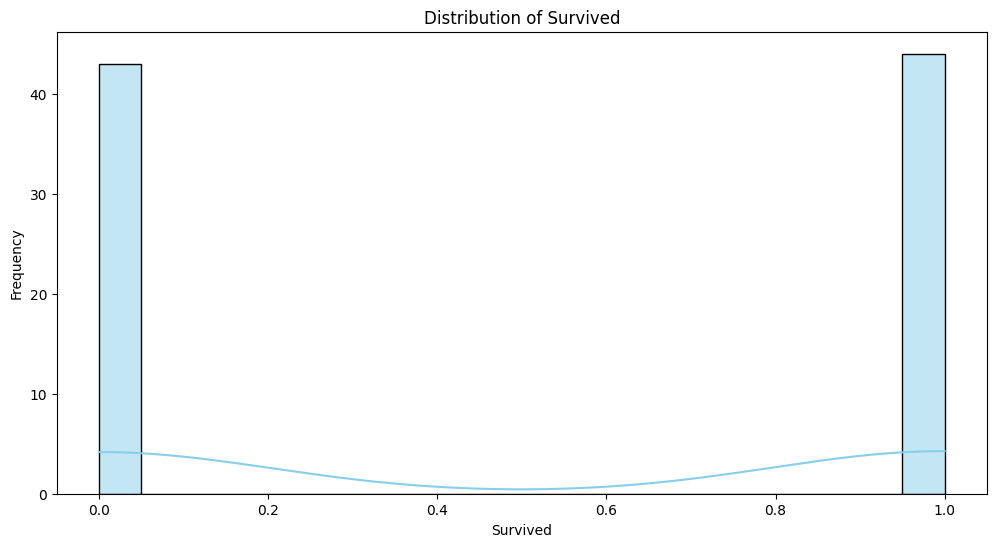

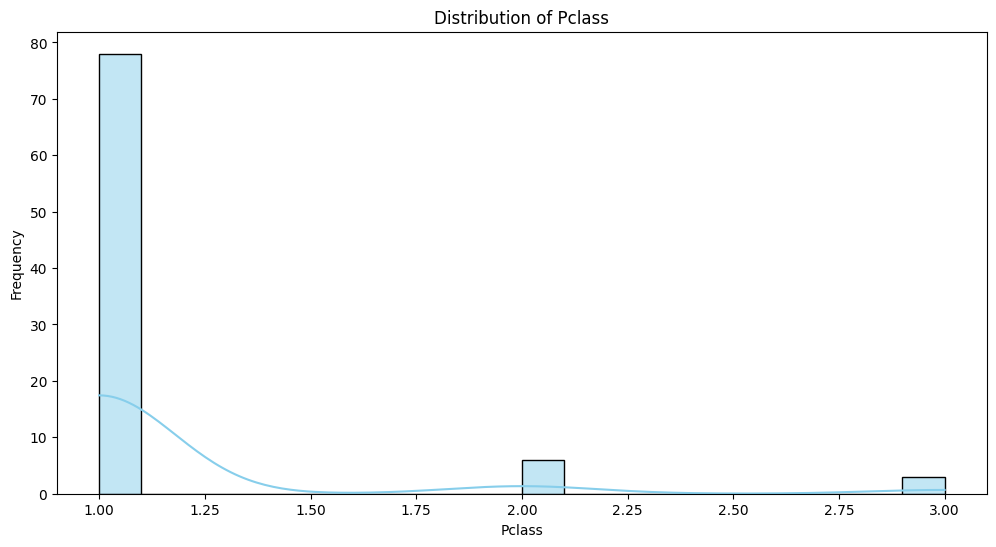

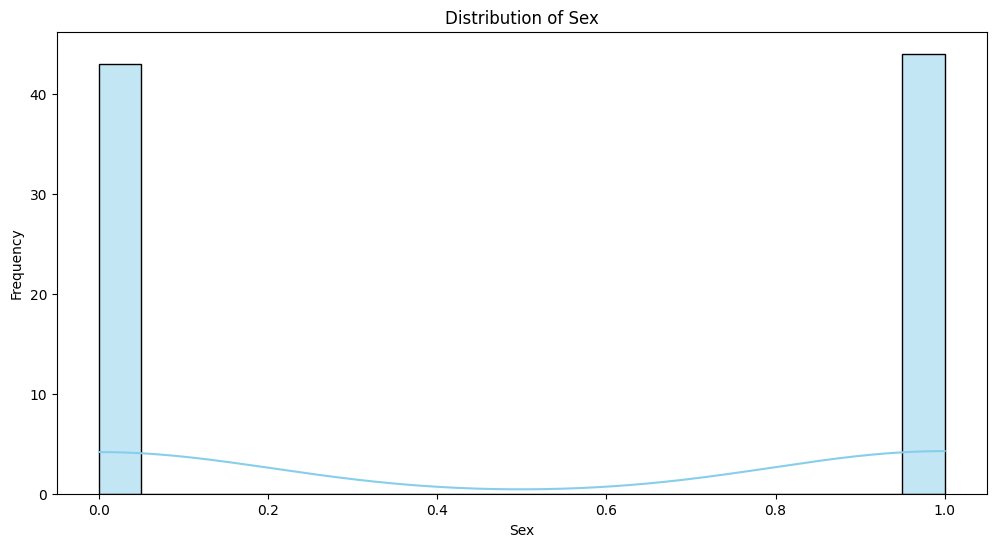

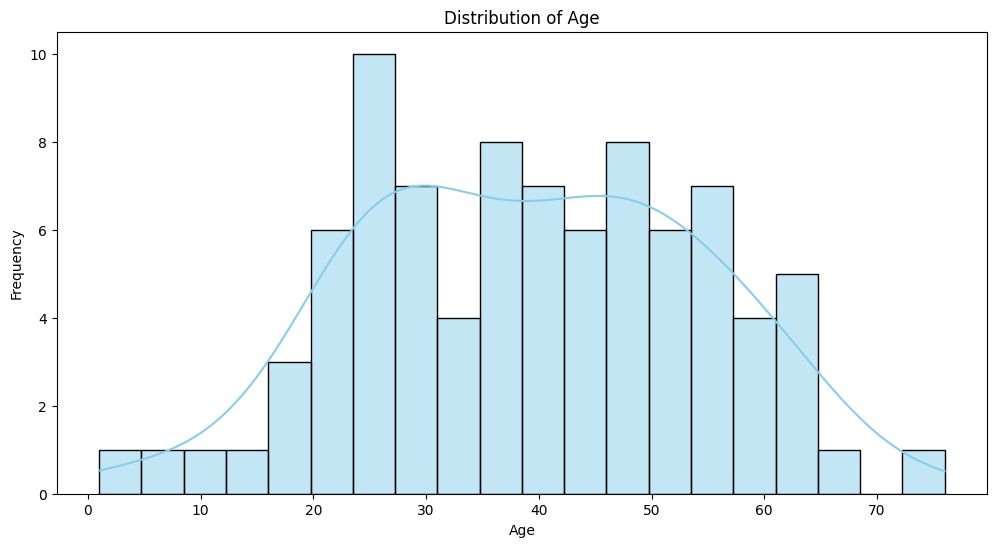

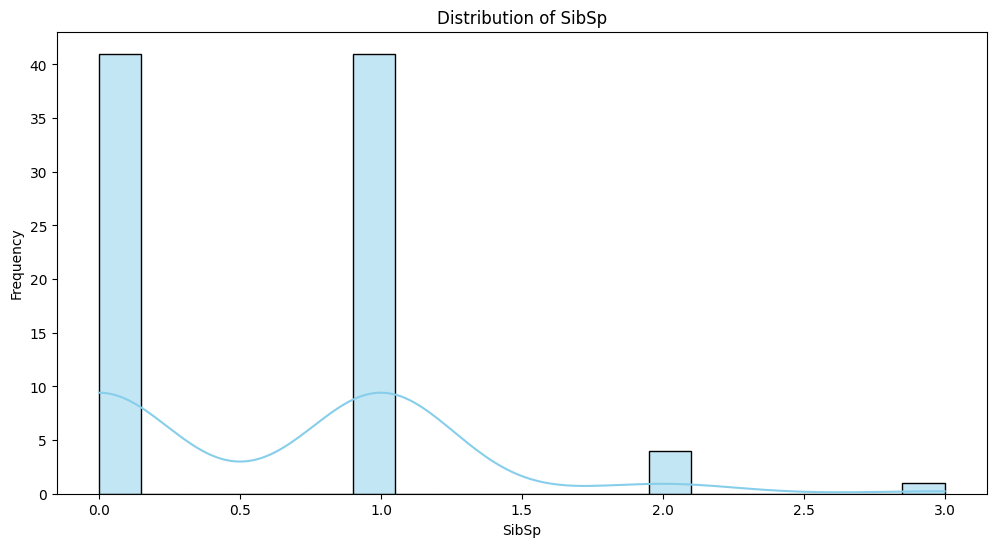

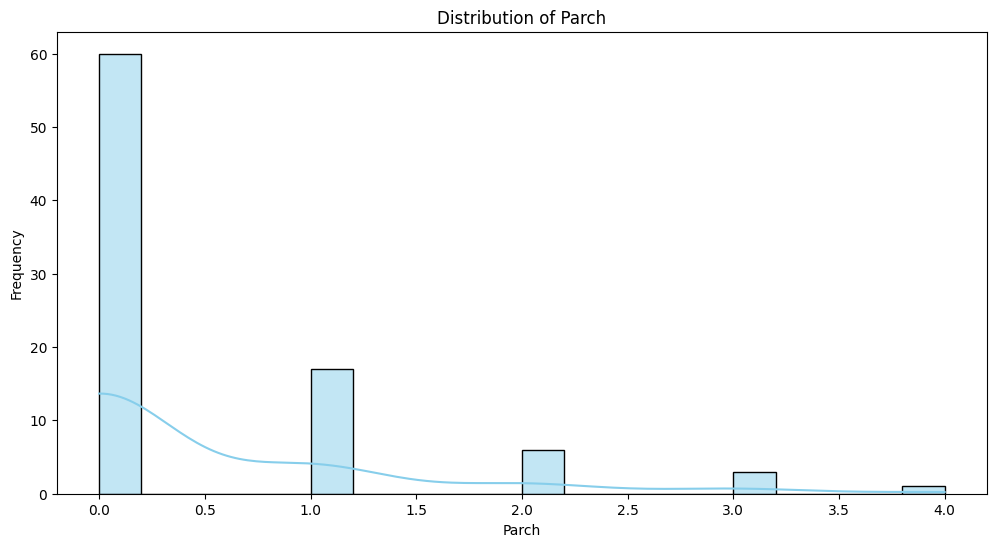

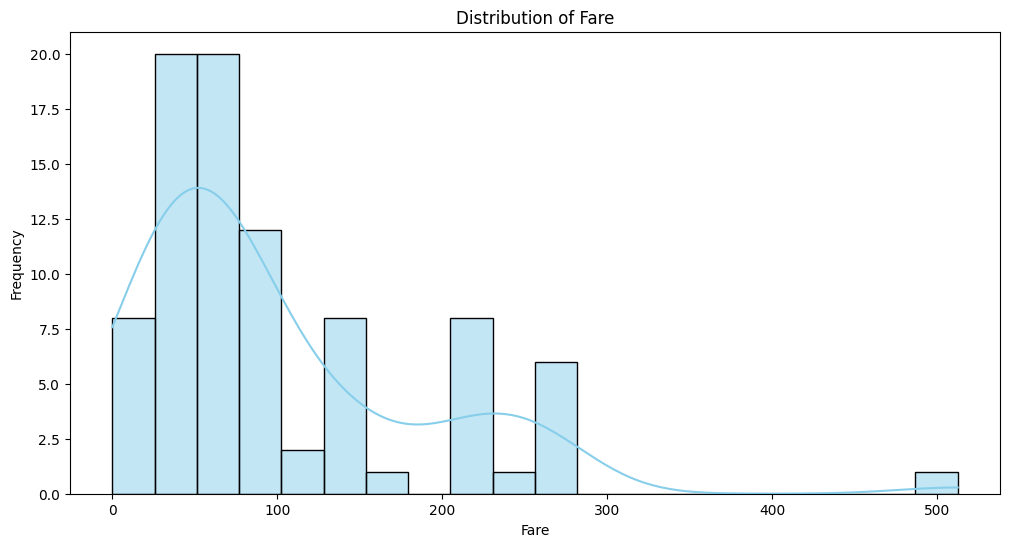

In [433]:
columns = data.select_dtypes(include=np.number).columns.tolist()
for col in columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 1000x800 with 0 Axes>

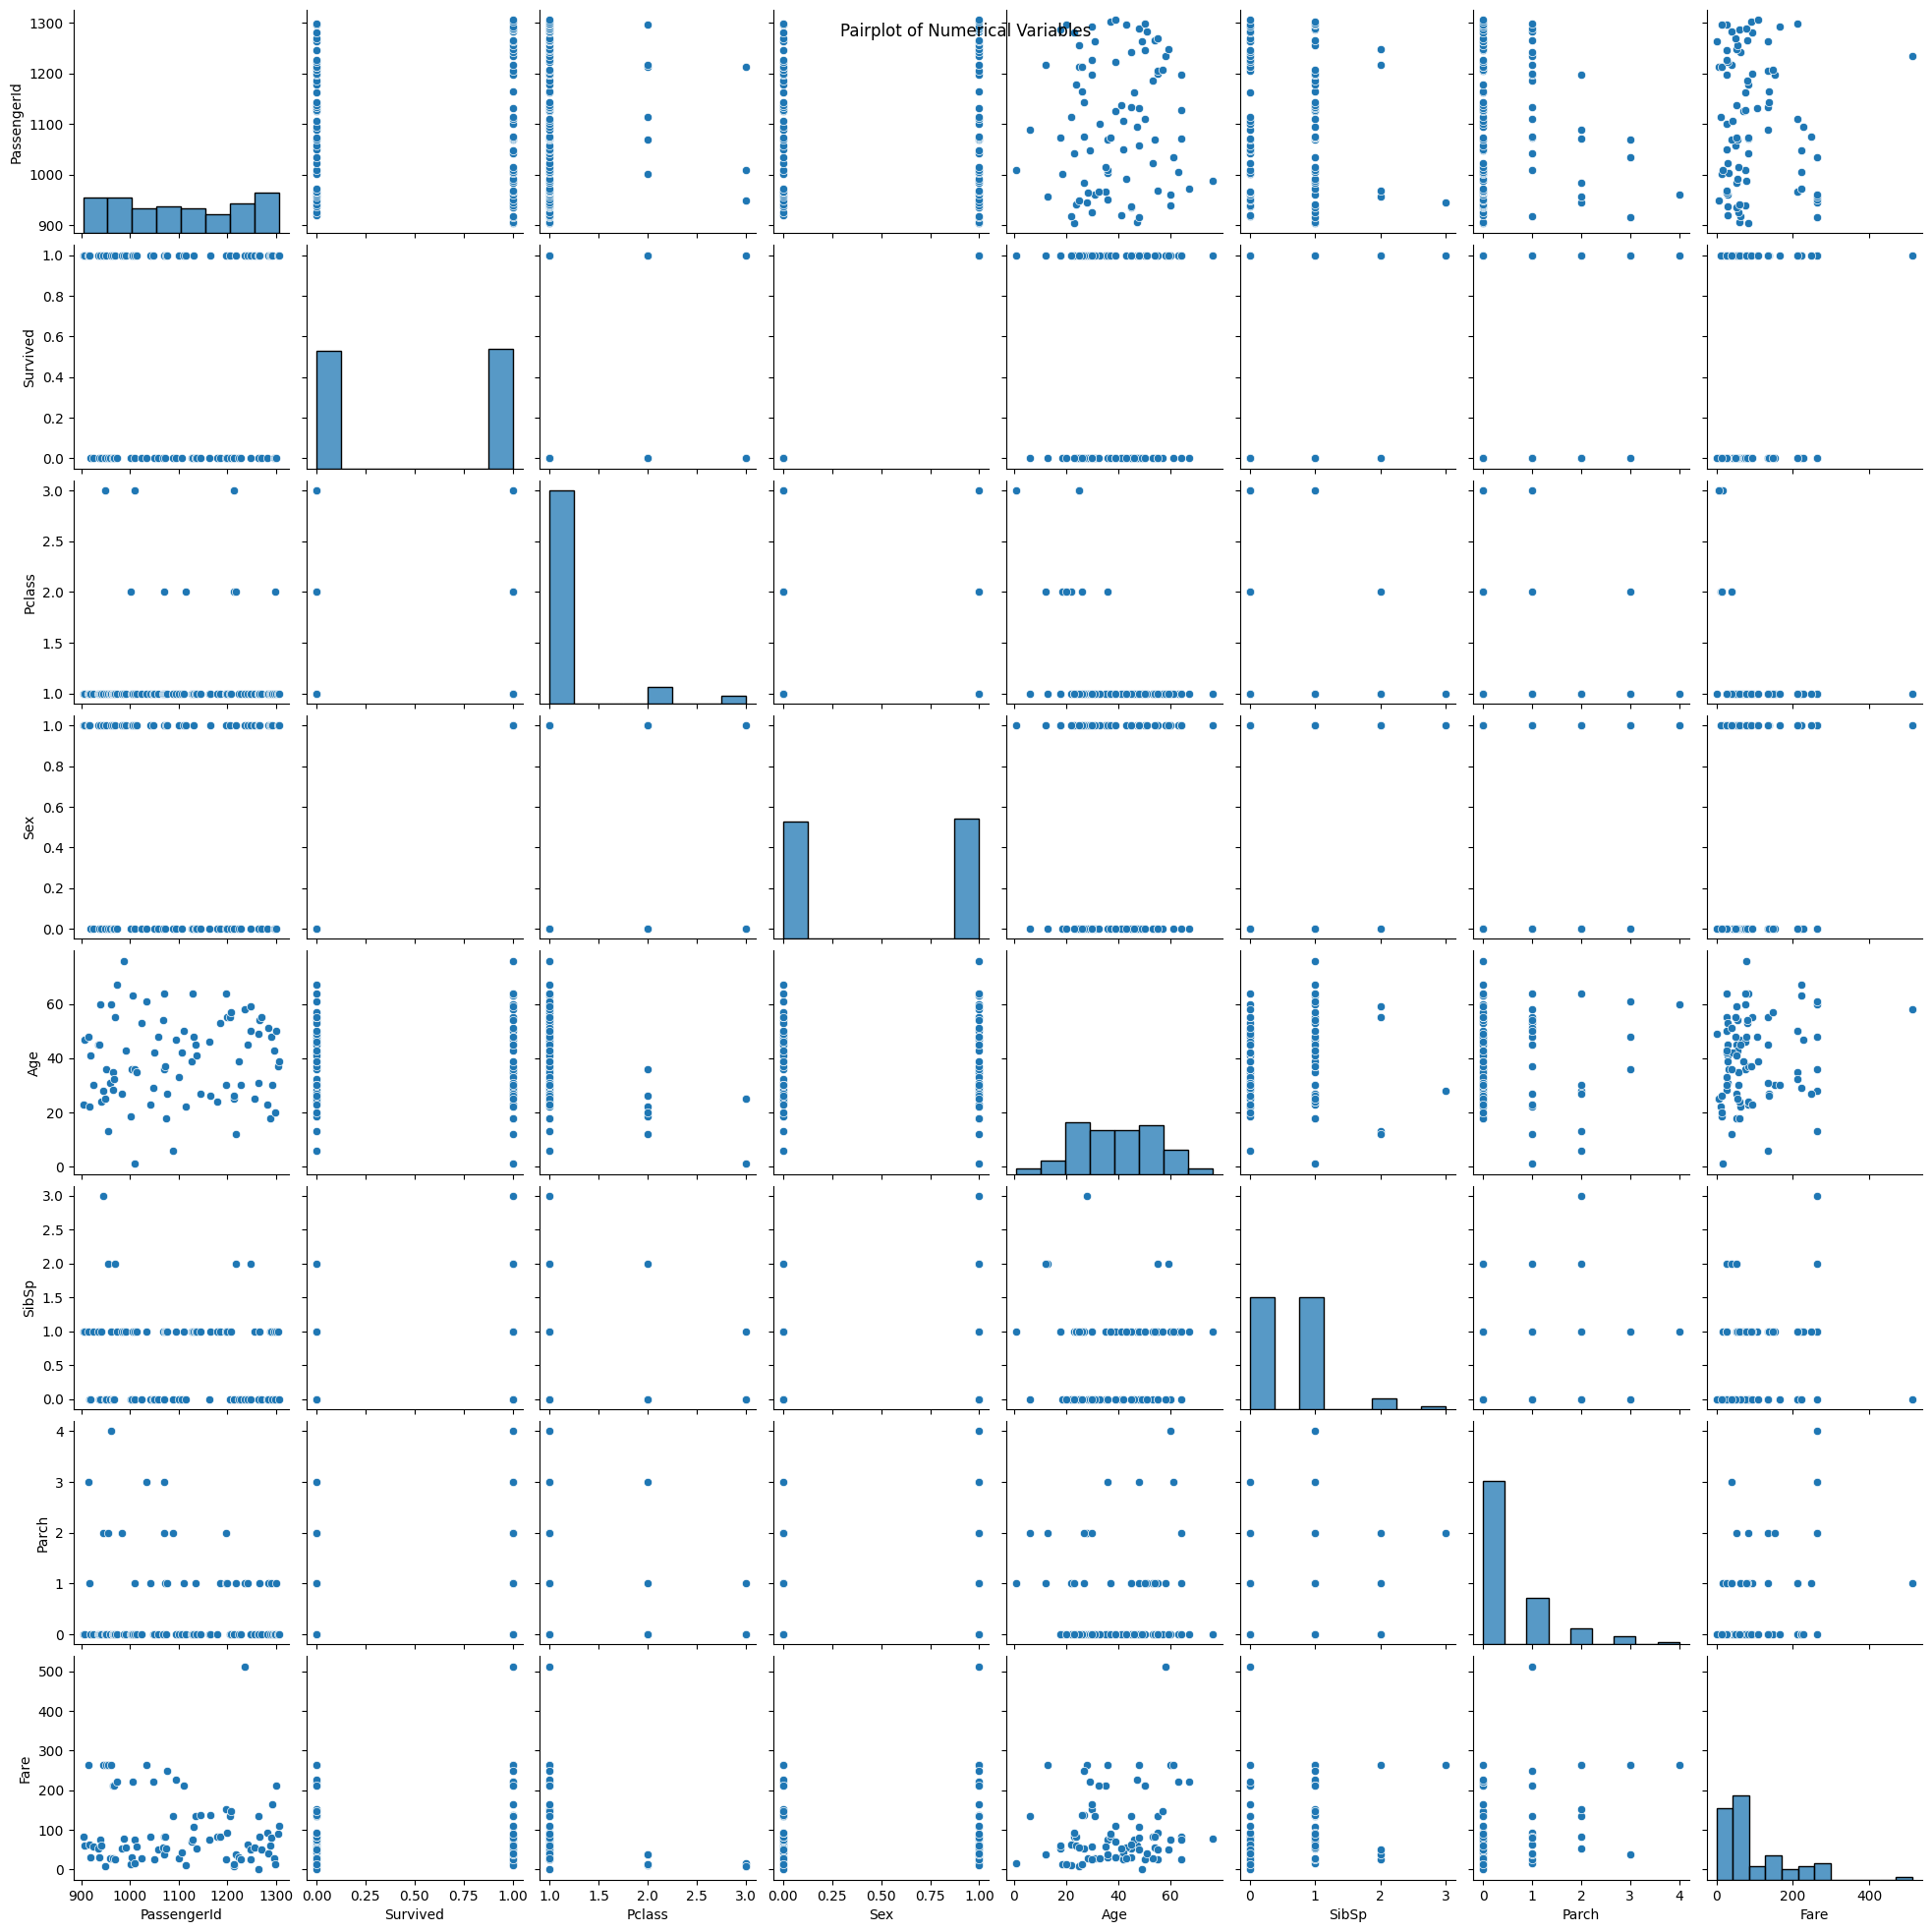

In [434]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[numeric_cols])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

Linear Regression Model

Implementation

In [435]:
x = data[['Age']]
y = data['Survived']

In [436]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Evaluation

In [437]:
y_pred = model.predict(x_test)

In [438]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Intercept: 0.4931070793079952
Coefficients: [-8.89441001e-06]
Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.25087221435974155
Root Mean Squared Error (RMSE): 0.5008714549260534
R-squared (R2): -0.01603246815695325


Logistic Regression Model

In [439]:
x_logistic = data[['Age']]
y_logistic = data['Survived']

In [440]:
x_train_logistic, x_test_logistic, y_train_logistic, y_test_logistic = train_test_split(x_logistic, y_logistic, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(x_train_logistic, y_train_logistic)

LogisticRegression()

Implementation

In [441]:
y_pred_logistic = logistic_model.predict(x_test_logistic)

Evaluation

In [442]:
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)
roc_auc = roc_auc_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score: {:.2f}".format(roc_auc))
print("Confusion Matrix:")
print(conf_matrix)

Intercept: 0.4931070793079952
Coefficients: [-8.89441001e-06]
Logistic Regression Model Evaluation:
Accuracy: 0.4444444444444444
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.50
Confusion Matrix:
[[ 8  0]
 [10  0]]


**Model Comparison and Selection**

The Titanic dataset is a classic dataset used for binary classification tasks where the goal is to predict whether a passenger survived (1) or not (0) based on various features such as age, sex, ticket class, fare, etc.

Linear Regression is not suitable for binary classification tasks like predicting survival (0 or 1). Linear Regression assumes a continuous numeric output, making it inappropriate for predicting discrete categories. While the logistic Regression is well-suited for binary classification tasks, making it ideal for predicting survival (0 or 1) in the Titanic dataset.It models the probability of survival based on input features and provides interpretable results.

so in selecting whether the linear or logistic, its better to choose logistic regression because it offer interpretable results and performance metric. it enable effective evaluation and interpretation of model predictions.

**Conclusion and Insights**

  The Titanic dataset contains passenger information and a binary target variable indicating survival (1 for survived, 0 for not survived). Preprocessing steps included handling missing values , encoding categorical variables, and splitting the dataset into training and testing sets. EDA involved visualizing relationships between variables using histograms, scatter plots, and correlation matrices to understand patterns and identify insights. Two types of models were applied:
Linear Regression: Attempted but deemed unsuitable due to the nature of the target variable (binary classification).
Logistic Regression: Chosen for its suitability in binary classification tasks, predicting survival probabilities based on passenger features.

**Reference**

Data: https://www.kaggle.com/datasets/brendan45774/test-file

Libraries: numpy, matplotlib.pyplot, seaborn, pandas, scipy.stats, sklearn.model_selection, sklearn.linear_model, roc_curve, auc, roc_auc_score, sklearn.preprocessing.